# Data analysis

## 0. python imports

In [1]:
import pandas as pd
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind
from datetime import date

## 1. data loading

- let's load some data about the sentiment of tweets today and in the past...<br>
- and make sure the 'date' variable is in Timestamp type

In [2]:
data = pd.read_csv('/Users/Blanca/ironhack/gitrepo/ih_datamadpt0420_final_project/data/results/data_sentiment.csv')
data.shape

(9162, 17)

In [3]:
# select required columns
data = data.drop(columns =['Unnamed: 0', 'Unnamed: 0.1'])

In [4]:
# change date type from 'object' to 'date'
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.dtypes

Unnamed: 0.1.1               float64
Unnamed: 0.1.1.1             float64
Unnamed: 0.1.1.1.1           float64
date                  datetime64[ns]
id                             int64
text                          object
user_name                     object
tweets_clean                  object
sentiment                     object
score                        float64
label                         object
label_coded                    int64
score_coded                  float64
user_id                      float64
user_screen_name              object
dtype: object

In [6]:
data['month'] = data['date'].dt.to_period('M')
data.head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,date,id,text,user_name,tweets_clean,sentiment,score,label,label_coded,score_coded,user_id,user_screen_name,month
0,0.0,0.0,0.0,2020-09-29 06:34:23,1310830261450539009,RT @carnecrudaradio: Quiero felicitar al alcal...,alex vega,RT Quiero felicitar al alcalde por su exitosa ...,"[{'label': 'NEGATIVE', 'score': 0.985985696315...",0.985986,NEGATIVE,-1,-0.985986,NaN,NaN,2020-09
1,1.0,1.0,1.0,2020-09-29 07:01:33,1310837099189473280,Señores de @BiciMAD @MADRID las bicis están mu...,Neuroneater,Se ores de las bicis est n muy descuidadas lo ...,"[{'label': 'NEGATIVE', 'score': 0.981788218021...",0.981788,NEGATIVE,-1,-0.981788,NaN,NaN,2020-09
2,2.0,2.0,2.0,2020-09-29 07:43:50,1310847740386201600,@JMDLatina Espero de este distrito no solo que...,Andrés Pina,Espero de este distrito no solo que proteja el...,"[{'label': 'NEGATIVE', 'score': 0.980981051921...",0.980981,NEGATIVE,-1,-0.980981,NaN,NaN,2020-09
3,3.0,3.0,3.0,2020-09-29 07:53:20,1310850131344920576,RT @_AguilarM: @PlataformaEMT @BiciMAD @bcarab...,ElMaNDaLoRiaNo,RT AguilarM O la fecha de la ltima OPE para Av...,"[{'label': 'NEGATIVE', 'score': 0.983189225196...",0.983189,NEGATIVE,-1,-0.983189,NaN,NaN,2020-09
4,4.0,4.0,4.0,2020-09-29 08:05:56,1310853301810888704,La misma vergüenza de TODOS los días. Una esta...,Diego Azul,La misma verg enza de TODOS los d as Una estac...,"[{'label': 'NEGATIVE', 'score': 0.994368195533...",0.994368,NEGATIVE,-1,-0.994368,NaN,NaN,2020-09


## 2. Data grouping

#### 2.1 Getting dates: 
- today
- yesterday 
- this month 
- last month 
<hr>

In [7]:
# getting today's Timestamp
today = pd.Timestamp.today().floor('D')
# .normalize() does the same thing

In [8]:
today

Timestamp('2020-10-25 00:00:00')

In [9]:
yesterday = today - pd.Timedelta(days=1)

In [10]:
yesterday

Timestamp('2020-10-24 00:00:00')

In [11]:
this_month = today.to_period('M').to_timestamp()

In [12]:
this_month

Timestamp('2020-10-01 00:00:00')

In [13]:
this_month_name = pd.Timestamp.month_name(this_month)

In [14]:
this_month_name

'October'

In [15]:
last_month = this_month - pd.Timedelta(days=30)

In [16]:
last_month

Timestamp('2020-09-01 00:00:00')

In [17]:
last_month_name = pd.Timestamp.month_name(last_month)

In [18]:
last_month_name

'September'

#### 2.2 Create dfs for each: 
- today
- yesterday 
- this month 
- last month 
<hr>

##### 2.1.1 - Yesterday

In [19]:
#greater than the start date and smaller than the end date
yesterday_mask = (data['date'] > yesterday) & (data['date'] <= today)

In [20]:
df_yesterday = data.loc[yesterday_mask]

In [21]:
df_yesterday.date.max()

Timestamp('2020-10-24 08:39:16')

In [22]:
df_yesterday.date.min()

Timestamp('2020-10-24 01:47:04')

In [23]:
df_yesterday.shape[0]

52

##### 2.1.2 - Today

In [24]:
#greater than the start date and smaller than the end date
today_mask = (data['date'] > today)

In [25]:
df_today = data.loc[today_mask]

In [26]:
df_today.date.min()

Timestamp('2020-10-25 00:08:36')

In [27]:
df_today.date.max()

Timestamp('2020-10-25 15:52:06')

In [28]:
df_today.shape[0]

135

##### 2.1.3 - This monoth

In [29]:
#greater than the start date and smaller than the end date
this_month_mask = (data['date'] > this_month)

In [30]:
df_this_month = data.loc[this_month_mask]

In [31]:
df_this_month.date.max()

Timestamp('2020-10-25 15:52:06')

In [32]:
df_this_month.date.min()

Timestamp('2020-10-01 01:01:32')

In [33]:
df_this_month.shape[0]

8984

##### 2.1.4 - Last month

In [34]:
#greater than the start date and smaller than the end date
last_month_mask = (data['date'] >= last_month) & (data['date'] < this_month)

In [35]:
df_last_month = data.loc[last_month_mask]

In [36]:
df_last_month.date.max()

Timestamp('2020-09-30 23:02:23')

In [37]:
df_last_month.shape[0]

178

## 2. hypothesis test (related samples)

test related distributions, is the difference between them due to chance?

In [38]:
# ttest_rel(data_past['score_coded'], data_today['score_coded'])

this is equivalent to a 1 sample vs constant hypothesis test with the sample as the different of values in samples versus a zero value constant...

In [39]:
# blood_pressure['diff'] = blood_pressure['after'] - blood_pressure['before']
# blood_pressure.head()

In [40]:
# ttest_1samp(blood_pressure['diff'], 0)

## 3. hypothesis test example (independent samples)

##### 3.1.1 - Today vs yesterday

In [41]:
# Assuming equal variances 
ttest_ind(df_last_month['score_coded'], df_this_month['score_coded'], equal_var=True)

Ttest_indResult(statistic=-0.515449147550721, pvalue=0.6062516354387104)

In [42]:
# Not assuming equal variances 
ttest_ind(df_last_month['score_coded'], df_this_month['score_coded'], equal_var=False)

Ttest_indResult(statistic=-0.5941382762504899, pvalue=0.5531394446133548)

##### 3.1.2 - Today vs avg. month

In [43]:
# Assuming equal variances 
ttest_ind(df_this_month['score_coded'], df_today['score_coded'], equal_var=True)

Ttest_indResult(statistic=1.5164618829145835, pvalue=0.12943727169301705)

In [44]:
# Not assuming equal variances 
ttest_ind(df_this_month['score_coded'], df_today['score_coded'], equal_var=False)

Ttest_indResult(statistic=1.7536703226752202, pvalue=0.08168345814762963)

##### 3.1.3 - This vs last month

In [45]:
# Assuming equal variances 
ttest_ind(df_this_month['score_coded'], df_last_month['score_coded'], equal_var=True)

Ttest_indResult(statistic=0.515449147550721, pvalue=0.6062516354387104)

In [46]:
# Not assuming equal variances 
ttest_ind(df_this_month['score_coded'], df_last_month['score_coded'], equal_var=False)

Ttest_indResult(statistic=0.5941382762504899, pvalue=0.5531394446133548)

##### 3.1.4 - Today vs past

In [47]:
# Assuming equal variances 
ttest_ind(data['score_coded'], df_today['score_coded'], equal_var=True)

Ttest_indResult(statistic=1.5116506506830432, pvalue=0.13065675442394956)

In [48]:
# Not assuming equal variances 
ttest_ind(data['score_coded'], df_today['score_coded'], equal_var=False)

Ttest_indResult(statistic=1.7439892285039524, pvalue=0.08336606490746648)

## 4. Key results for daily reports

#### 4.1 - Today

In [49]:
# 'mean', 
sentiment_today_mean = df_today['score_coded'].mean()
# 'N. tweets (+)'
tweets_pos_today = sum(df_today["label"] == "NEGATIVE")
# 'N. tweets (-)'
tweets_neg_today = sum(df_today["label"] == "POSITIVE")
# 'Total tweets'
tweets_tot = df_today.shape[0]
#  'N. users (+)'
sentiment_today_mean = df_today['score_coded'].mean()
# 'N. users (-)'
sentiment_today_mean = df_today['score_coded'].mean()
# 'Total users'
sentiment_today_mean = df_today['score_coded'].mean()

In [50]:
# df_user = df_today.groupby('user_name')['score_coded'].mean()
# df_user

In [51]:
sentiment_labels = ['very negative', 'negative', 'moderate', 'positive', 'very positive']

In [52]:
df_score1 = (pd.cut(df_today['score_coded'] ,bins=[-1.0, -.60, -.20, .20, .60, 1.0] ,
                            labels=sentiment_labels).value_counts())

In [53]:
df_score1

very negative    129
very positive      6
positive           0
moderate           0
negative           0
Name: score_coded, dtype: int64

In [54]:
df_score2 = (pd.cut(df_yesterday['score_coded'] ,bins=[-1, -.6, -.2, .2, .6, 1.0],
                            labels=sentiment_labels).value_counts())

In [55]:
df_score2

very negative    52
very positive     0
positive          0
moderate          0
negative          0
Name: score_coded, dtype: int64

In [56]:
df_score3 = (pd.cut(df_this_month['score_coded'] ,bins=[-1, -.6, -.2, .2, .6, 1.0],
                            labels=sentiment_labels).value_counts())

In [57]:
df_score3

very negative    8242
very positive     557
positive           94
negative           91
moderate            0
Name: score_coded, dtype: int64

In [58]:
df_score4 = (pd.cut(df_last_month['score_coded'] ,bins=[-1, -.6, -.2, .2, .6, 1.0],
                            labels=sentiment_labels).value_counts())

In [59]:
df_score4

very negative    168
very positive      8
positive           2
moderate           0
negative           0
Name: score_coded, dtype: int64

In [60]:
df_score = pd.DataFrame(columns = ['Today', 'Yesterday', this_month_name, last_month_name],  
                   index = sentiment_labels) 

In [61]:
df_score

,Today,Yesterday,October,September
very negative,NaN,NaN,NaN,NaN
negative,NaN,NaN,NaN,NaN
moderate,NaN,NaN,NaN,NaN
positive,NaN,NaN,NaN,NaN
very positive,NaN,NaN,NaN,NaN


In [62]:
df_score['Today'] = df_score1
df_score['Yesterday'] = df_score2
df_score.iloc[:, 2] = df_score3
df_score.iloc[:, 3] = df_score4
df_score.rename_axis('Sentiment')

,Today,Yesterday,October,September
Sentiment,,,,
very negative,129,52,8242,168
negative,0,0,91,0
moderate,0,0,0,0
positive,0,0,94,2
very positive,6,0,557,8


In [63]:
df_score_fig = df_score.reset_index()
df_score_fig.columns = ['sentiment', 'Today', 'Yesterday', this_month_name, last_month_name]

In [64]:
df_score_fig

,sentiment,Today,Yesterday,October,September
0,very negative,129,52,8242,168
1,negative,0,0,91,0
2,moderate,0,0,0,0
3,positive,0,0,94,2
4,very positive,6,0,557,8


In [65]:
df_score_fig1= df_score_fig[['sentiment', 'Today', 'Yesterday']]

In [66]:
df_score_fig1

,sentiment,Today,Yesterday
0,very negative,129,52
1,negative,0,0
2,moderate,0,0
3,positive,0,0
4,very positive,6,0


In [67]:
df_score_fig2= df_score_fig[['sentiment', this_month_name, last_month_name]]

In [68]:
df_score_fig2

,sentiment,October,September
0,very negative,8242,168
1,negative,91,0
2,moderate,0,0
3,positive,94,2
4,very positive,557,8


In [69]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [71]:
"""fig1 = px.bar(df_score_fig1, x = 'sentiment', y = [df_score_fig1[i] for i in df_score_fig1.columns if i!='sentiment'], barmode='group', 
              title = "@BiciMAD Tweets sentiments Today vs Yesterday", 
              labels = {"sentiment":"Sentiment", "value":"N. tweets",
                       'variable':"Day"})
fig.update(layout=dict(showlegend=True,
                       autosize=True,
                       # width=500,
                       # height=500,
    legend_orientation="h",
    margin=dict(l=0, r=0, t=40, b=30),
    paper_bgcolor="LightSteelBlue",
    title = "@BiciMAD Tweets sentiments Today vs Yesterday",
    annotations =[go.layout.Annotation(text='This one', x = 2, y=50)]
))
fig.update_yaxes(automargin=True)"""

'fig1 = px.bar(df_score_fig1, x = \'sentiment\', y = [df_score_fig1[i] for i in df_score_fig1.columns if i!=\'sentiment\'], barmode=\'group\', \n              title = "@BiciMAD Tweets sentiments Today vs Yesterday", \n              labels = {"sentiment":"Sentiment", "value":"N. tweets",\n                       \'variable\':"Day"})\nfig.update(layout=dict(showlegend=True,\n                       autosize=True,\n                       # width=500,\n                       #\xa0height=500,\n    legend_orientation="h",\n    margin=dict(l=0, r=0, t=40, b=30),\n    paper_bgcolor="LightSteelBlue",\n    title = "@BiciMAD Tweets sentiments Today vs Yesterday",\n    annotations =[go.layout.Annotation(text=\'This one\', x = 2, y=50)]\n))\nfig.update_yaxes(automargin=True)'

In [72]:
date = print(f"{today.day_name()} {today.day} {today.month_name()} {today.year}")

Sunday 25 October 2020


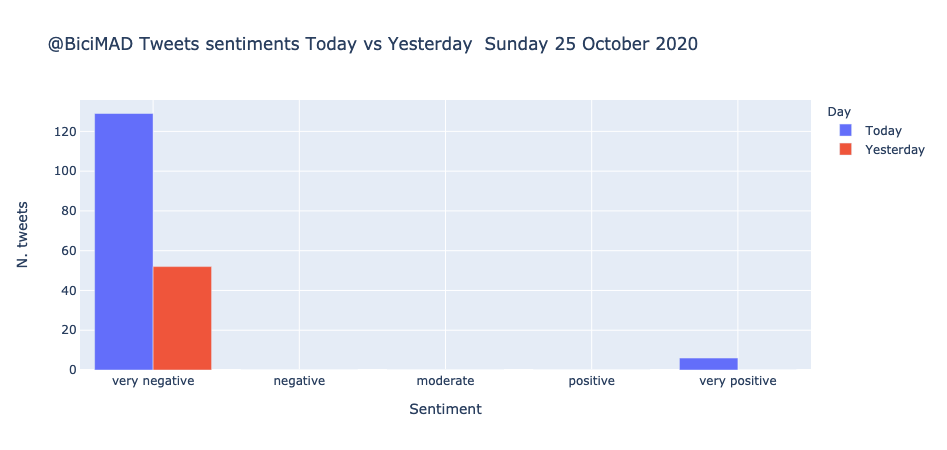

In [76]:
fig1 = px.bar(df_score_fig1, x = 'sentiment', y = [df_score_fig1[i] for i in df_score_fig1.columns if i!='sentiment'], barmode='group', 
              title = f"@BiciMAD Tweets sentiments Today vs Yesterday \n{today.day_name()} {today.day} {today.month_name()} {today.year}", 
              labels = {"sentiment":"Sentiment", "value":"N. tweets",
                       'variable':"Day"})
fig1.show()

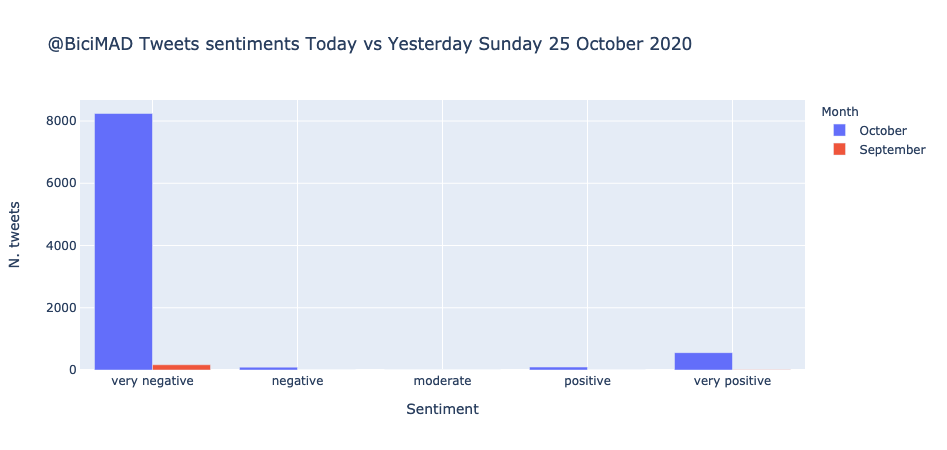

In [78]:
fig2 = px.bar(df_score_fig2, x = 'sentiment', y = [df_score_fig2[i] for i in df_score_fig2.columns if i!='sentiment'], barmode='group', 
              title = f"@BiciMAD Tweets sentiments Today vs Yesterday\n{today.day_name()} {today.day} {today.month_name()} {today.year}", 
              labels = {"sentiment":"Sentiment", "value":"N. tweets",
              "variable": "Month"})
fig2.show()

In [ ]:
# htmkl file
plotly.offline.plot(fig1, filename='/Users/Blanca/ironhack/gitrepo/ih_datamadpt0420_final_project/data/results/tweet_sentiment1.html')
plotly.offline.plot(fig2, filename='/Users/Blanca/ironhack/gitrepo/ih_datamadpt0420_final_project/data/results/tweet_sentiment2.html')

In [ ]:
fig1.write_image("/Users/Blanca/ironhack/gitrepo/ih_datamadpt0420_final_project/data/results/tweet_sentiment1.png")
fig2.write_image("/Users/Blanca/ironhack/gitrepo/ih_datamadpt0420_final_project/data/results/tweet_sentiment2.png")

##### 2.1.2 - Today

In [ ]:
df = new_df.value_counts()

In [ ]:
sentiment_yesterday_mean = df_yesterday['score_coded'].mean()

In [ ]:
sentiment_labels = ['very negative', 'negative', 'moderate', 'positive', 'very positive']
new_df_yes = pd.cut(df_yesterday['score_coded'], bins=5, labels=sentiment_labels)

In [ ]:
df = new_df_yes.value_counts()

In [ ]:
df

#### 4.3 - This month

In [ ]:
sentiment_this_month_mean = df_this_month['score_coded'].mean()

#### 4.4 - Past month

In [ ]:
sentiment_lastmonth_mean = df_last_month['score_coded'].mean()

In [ ]:
data = [[sentiment_today_mean, sentiment_yesterday_mean, sentiment_this_month_mean,sentiment_lastmonth_mean], 
        [2, 50, 60, 0], 
        [2, 80, 90, 0], 
        [3, 80, 90, 0],
        [2, 50, 60, 0], 
        [2, 80, 90, 0], 
        [3, 80, 90, 0],
       ]

In [ ]:
data

In [ ]:
df = pd.DataFrame(data, columns = ['Today', 'Yesterday', this_month_name, last_month_name],  
                   index = ['mean', 'N. tweets (+)', 'N. tweets (-)', 'Total tweets', 'N. users (+)', 'N. users (-)', 'Total users']) 

In [ ]:
df

In [ ]:
# Count of diffeerent users 
data['user_id'].nunique()

In [ ]:
data['user'] = data.groupby('user_name').cumcount()

In [ ]:
data.groupby('user_name').cumcount()

In [ ]:
rate_pivot = data.pivot(columns='user_name', values='score_coded', index='user')
rate_pivot

In [ ]:
data_subset = data[data['user_name'].isin(['Blanca Fernandez'])]

In [ ]:
data_subset

In [ ]:
rate_pivot['average'] = rate_pivot.mean(axis=1)
rate_pivot

In [ ]:
rate_pivot_b = pd.DataFrame({f'city_{i}': rate.loc[rate['City'] == i, 'Rate'].values 
                           for i in rate['City'].unique()})
rate_pivot_b

In [ ]:
rate_pivot_b = pd.DataFrame({f'user_{i}': data.loc[data['user'] == i, 'score_coded'].values 
                           for i in data['user_name'].unique()})
rate_pivot_b